In [1]:
import glob
import pandas as pd
import seaborn as sns

In [4]:
for i in glob.glob('/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-1/Texas*.csv'):
    print(i)
    index = '0.' + i.split('.')[1]
    print(index)
    unnormalized = pd.read_csv(i,index_col=0)
    unnormalized['normalize'] = False
    
    normalized = pd.read_csv(
        '/home/jupyter-zyh/Gnhe/analysis_setting/normalize/Integer/Texas_Int_Renewable1_1092Days_168HrsPerPeriod_{}.csv'.format(index),
        index_col=0)
    df_out = pd.concat([normalized,unnormalized])
    df_out['mae_ex_tc'] = df_out[['renewable_cap_0_err','renewable_cap_1_err','N_err','max_energy_err','max_power_err']].mean(axis=1)
    df_out.to_csv('/home/jupyter-zyh/Gnhe/analysis_setting/normalize/Integer/compare/Texas_Renewable1_1092Days_168HrsPerPeriod_{}.csv'.format(index))

/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-1/Texas_Int_Renewable1_1092Days_168HrsPerPeriod_0.7.csv
0.7
/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-1/Texas_Int_Renewable1_1092Days_168HrsPerPeriod_0.55.csv
0.55
/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-1/Texas_Int_Renewable1_1092Days_168HrsPerPeriod_0.8.csv
0.8
/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-1/Texas_Int_Renewable1_1092Days_168HrsPerPeriod_0.6.csv
0.6
/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-1/Texas_Int_Renewable1_1092Days_168HrsPerPeriod_0.75.csv
0.75
/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-1/Texas_Int_Renewable1_1092Days_168HrsPerPeriod_0.65.csv
0.65
/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Integer/Texas/profile-1/Texas_Int_Renewable1_1092Days_168HrsPerPeriod_0.95.csv
0.95
/home/jupyter-zyh/Gnhe/analysis_p

In [5]:
df_list = []
for i in glob.glob('/home/jupyter-zyh/Gnhe/analysis_setting/normalize/Integer/compare/Texas*.csv'):
    index = i.split('.')[0].split('_')[-1]
    temp = pd.read_csv(i,index_col=0)
    temp['index'] = index
    df_list.append(temp)
df = pd.concat(df_list,ignore_index=True)
df.to_csv('/home/jupyter-zyh/Gnhe/analysis_setting/normalize/Integer/compare/all.csv')

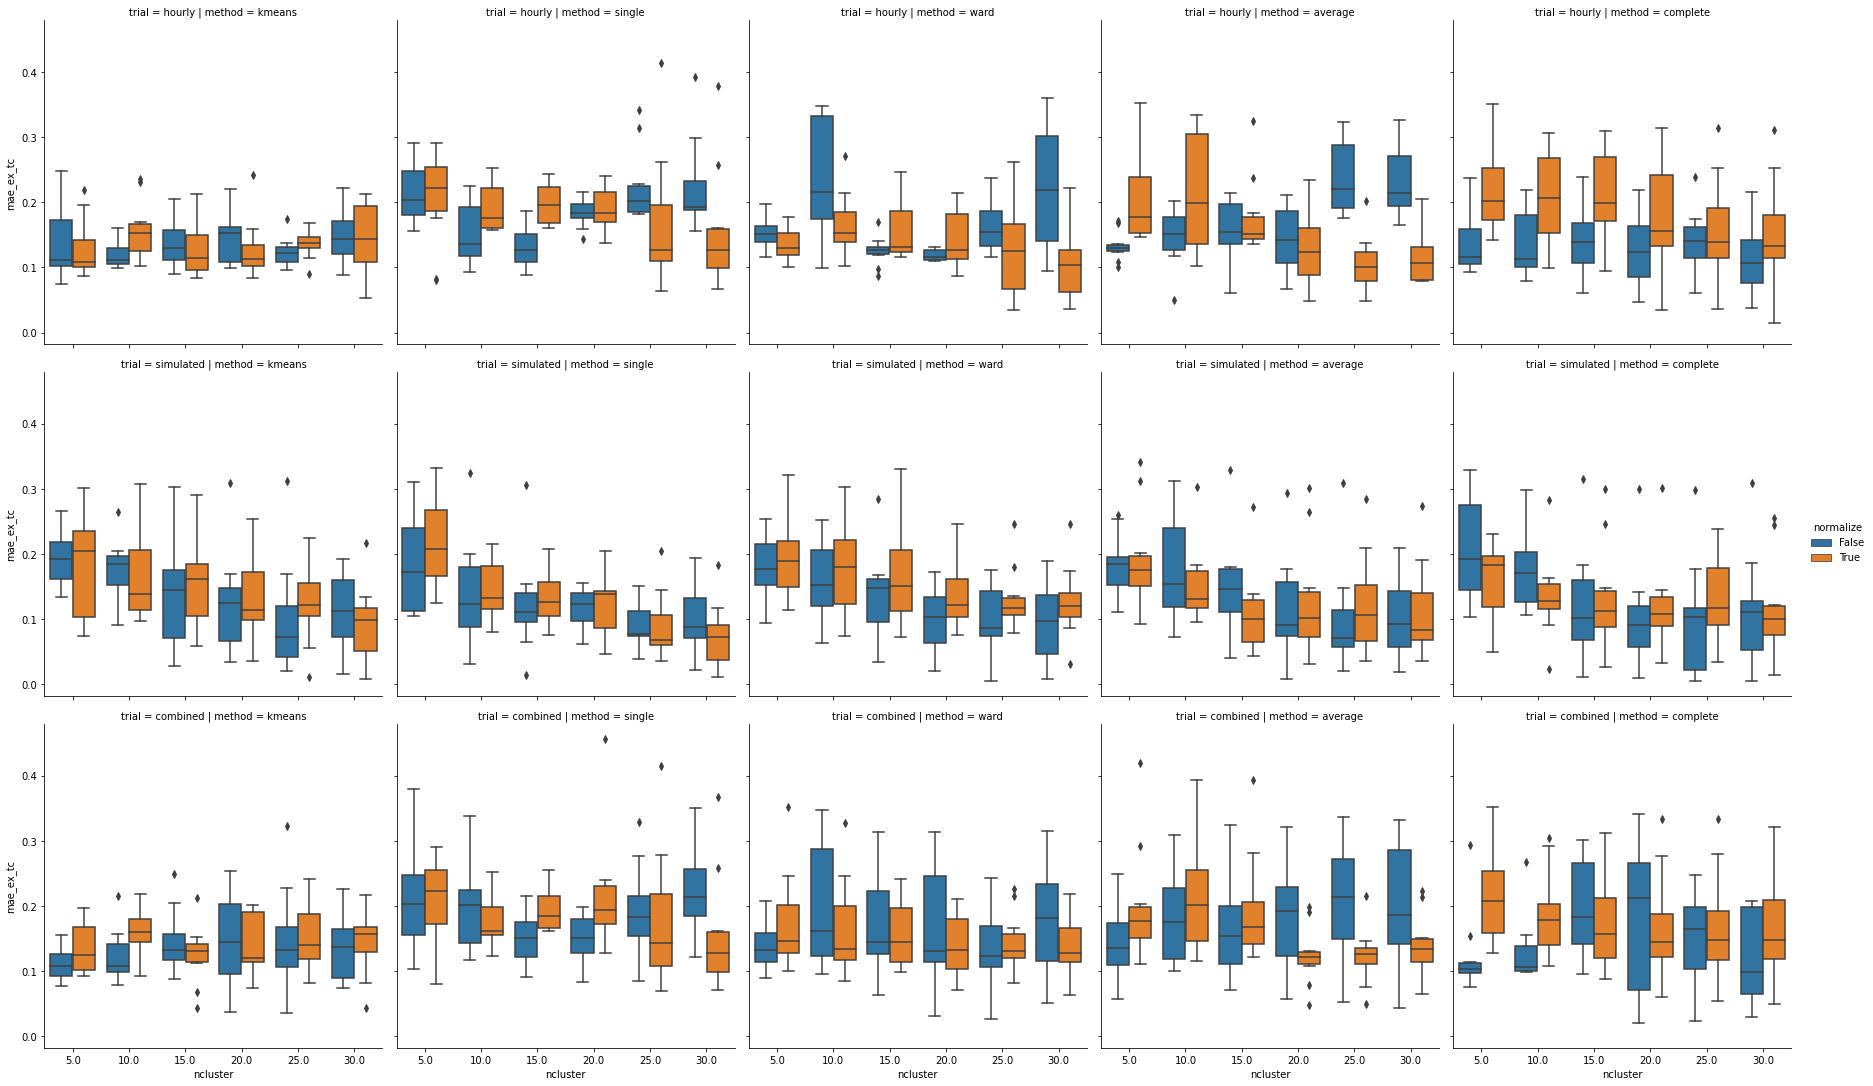

In [6]:
p = sns.catplot(data=df,row='trial',col='method',x='ncluster',y='mae_ex_tc',hue='normalize',kind='box')